#Título __Título__ _Título_ *__Título__*
##Título __Título__ _Título_ *__Título__*
###Título __Título__ _Título_ *__Título__*
Título __Título__ _Título_ *__Título__*

In [1]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
dias=['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']
horastrabalhadas=[6,7,8,6,7,5,4]
bugscorrigidos=[3,2,1,4,3,2,1]
tarefasconcluidas=[5,4,6,4,5,3,2]

In [8]:
#transformando as listas provenientes dos dados da imagem da tabela fornecida em dicionário
dici={
    'Dia':dias,
    'Horas Trabalhadas':horastrabalhadas,
    'Bugs Corrigidos':bugscorrigidos,
    'Tarefas Concluídas':tarefasconcluidas
}
dici

{'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'],
 'Horas Trabalhadas': [6, 7, 8, 6, 7, 5, 4],
 'Bugs Corrigidos': [3, 2, 1, 4, 3, 2, 1],
 'Tarefas Concluídas': [5, 4, 6, 4, 5, 3, 2]}

In [28]:
#convertendo o dicionario em arrays NumPy
arraydias=np.array(dias)
arrayhorastrabalhadas=np.array(horastrabalhadas)
arraybugscorrigidos=np.array(bugscorrigidos)
arraytarefasconcluidas=np.array(tarefasconcluidas)

In [30]:
arraydias

array(['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado',
       'Domingo'], dtype='<U7')

In [16]:
arrayhorastrabalhadas

array([6, 7, 8, 6, 7, 5, 4])

In [14]:
arraybugscorrigidos

array([3, 2, 1, 4, 3, 2, 1])

In [15]:
arraytarefasconcluidas

array([5, 4, 6, 4, 5, 3, 2])

In [45]:
#convertendo arrays em series pandas
seriesdias=pd.Series(arraydias)
serieshorastrabalhadas=pd.Series(arrayhorastrabalhadas)
seriesbugscorrigidos=pd.Series(arraybugscorrigidos)
seriestarefasconcluidas=pd.Series(arraytarefasconcluidas)

In [46]:
seriesdias

0    Segunda
1      Terça
2     Quarta
3     Quinta
4      Sexta
5     Sábado
6    Domingo
dtype: object

In [47]:
serieshorastrabalhadas

0    6
1    7
2    8
3    6
4    7
5    5
6    4
dtype: int64

In [48]:
seriesbugscorrigidos

0    3
1    2
2    1
3    4
4    3
5    2
6    1
dtype: int64

In [49]:
seriestarefasconcluidas

0    5
1    4
2    6
3    4
4    5
5    3
6    2
dtype: int64

In [50]:
df=pd.DataFrame({
    'Dias':seriesdias,
    'Horas Trabalhadas':serieshorastrabalhadas,
    'Bugs Corrigidos':seriesbugscorrigidos,
    'Tarefas Concluídas':seriestarefasconcluidas
})
df

,Dias,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluídas
0,Segunda,6,3,5
1,Terça,7,2,4
2,Quarta,8,1,6
3,Quinta,6,4,4
4,Sexta,7,3,5
5,Sábado,5,2,3
6,Domingo,4,1,2


In [26]:
import matplotlib.pyplot as plt

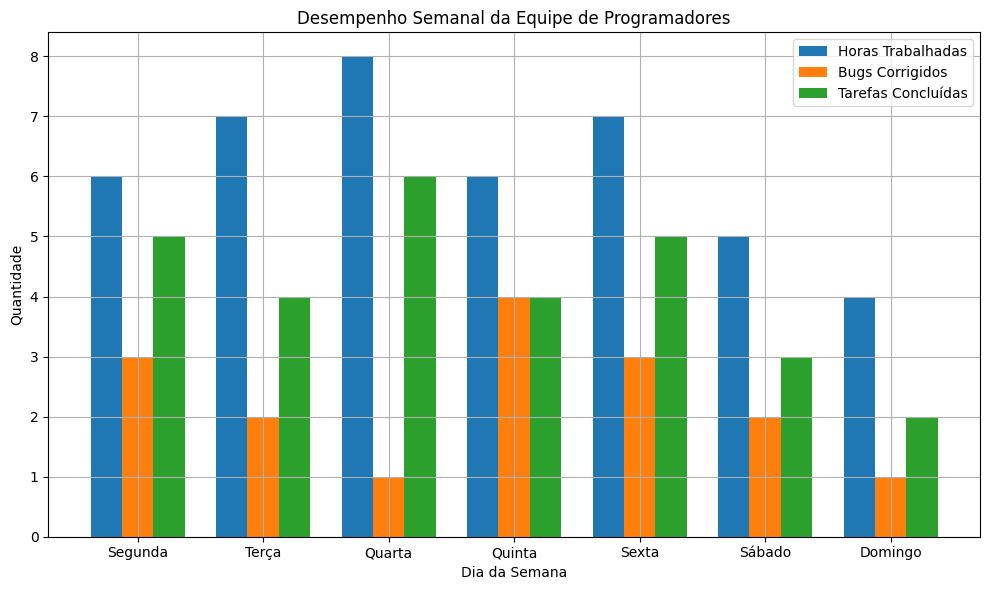

In [51]:
# Plotar gráfico de barras agrupadas
plt.figure(figsize=(10, 6))

width = 0.25
x = np.arange(len(df["Dias"]))

plt.bar(x - width, df["Horas Trabalhadas"], width, label='Horas Trabalhadas')
plt.bar(x, df["Bugs Corrigidos"], width, label='Bugs Corrigidos')
plt.bar(x + width, df["Tarefas Concluídas"], width, label='Tarefas Concluídas')

plt.xlabel("Dia da Semana")
plt.ylabel("Quantidade")
plt.title("Desempenho Semanal da Equipe de Programadores")
plt.xticks(x, df["Dias"])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

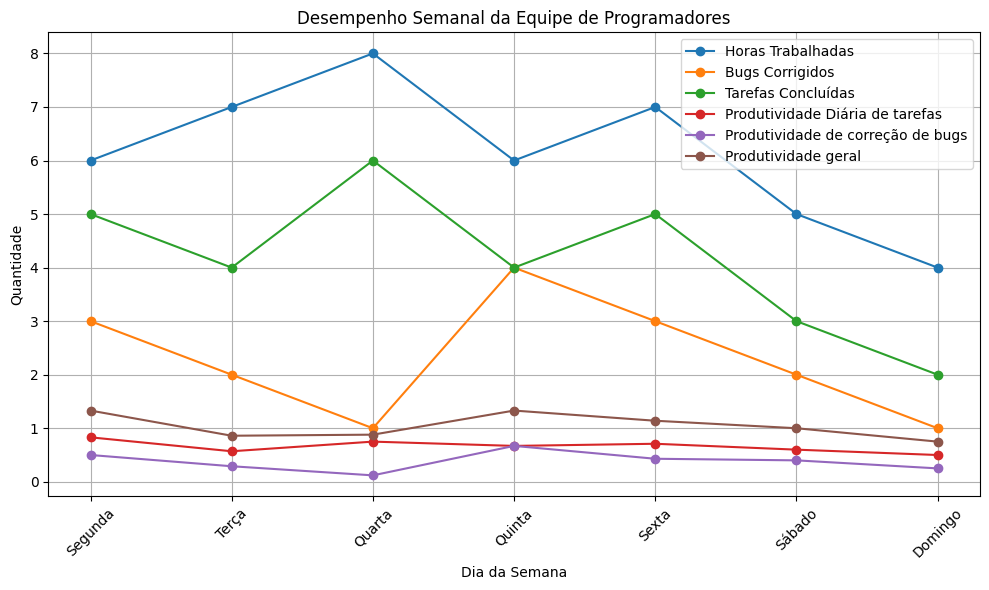

In [58]:
# Plotar gráfico de linhas
plt.figure(figsize=(10, 6))

plt.plot(df["Dias"], df["Horas Trabalhadas"], marker='o', label="Horas Trabalhadas")
plt.plot(df["Dias"], df["Bugs Corrigidos"], marker='o', label="Bugs Corrigidos")
plt.plot(df["Dias"], df["Tarefas Concluídas"], marker='o', label="Tarefas Concluídas")
plt.plot(df["Dias"], df["Produtividade Diária de tarefas"], marker='o', label="Produtividade Diária de tarefas")
plt.plot(df["Dias"], df["Produtividade de correção de bugs"], marker='o', label="Produtividade de correção de bugs")
plt.plot(df["Dias"], df["Produtividade geral"], marker='o', label="Produtividade geral")

plt.xlabel("Dia da Semana")
plt.ylabel("Quantidade")
plt.title("Desempenho Semanal da Equipe de Programadores")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Calcular a Produtividade Diária (Tarefas Concluídas por Hora)
df["Produtividade Diária de tarefas"] = df["Tarefas Concluídas"] / df["Horas Trabalhadas"]

# Produtividade de correção de bugs
df["Produtividade de correção de bugs"] = df["Bugs Corrigidos"] / df["Horas Trabalhadas"]

# Produtividade geral
df["Produtividade geral"] = (df["Bugs Corrigidos"] + df["Tarefas Concluídas"]) / df["Horas Trabalhadas"]

# Arredondar os valores para 2 casas decimais
df = df.round(2)

# Usando NumPy para calcular estatísticas
media_horas_trabalhadas = np.mean(df["Horas Trabalhadas"]).round(2)
media_produtividade_tarefas = np.mean(df["Produtividade Diária de tarefas"]).round(2)
media_produtividade_bugs = np.mean(df["Produtividade de correção de bugs"]).round(2)
media_produtividade_geral = np.mean(df["Produtividade geral"]).round(2)
desvio_padrao_horas_trabalhadas = np.std(df["Horas Trabalhadas"]).round(2)
desvio_padrao_produtividade_tarefas = np.std(df["Produtividade Diária de tarefas"]).round(2)
desvio_padrao_produtividade_bugs = np.std(df["Produtividade de correção de bugs"]).round(2)
desvio_padrao_produtividade_geral = np.std(df["Produtividade geral"]).round(2)

# Imprimir as estatísticas
print("Estatísticas do DataFrame:")
df
print("\nEstatísticas Gerais:")
print("Média Horas Trabalhadas:", media_horas_trabalhadas)
print("Média Produtividade Diária de Tarefas:", media_produtividade_tarefas)
print("Média Produtividade de Correção de Bugs:", media_produtividade_bugs)
print("Média Produtividade Geral:", media_produtividade_geral)
print("Desvio Padrão Horas Trabalhadas:", desvio_padrao_horas_trabalhadas)
print("Desvio Padrão Produtividade Diária de Tarefas:", desvio_padrao_produtividade_tarefas)
print("Desvio Padrão Produtividade de Correção de Bugs:", desvio_padrao_produtividade_bugs)
print("Desvio Padrão Produtividade Geral:", desvio_padrao_produtividade_geral)

Estatísticas do DataFrame:

Estatísticas Gerais:
Média Horas Trabalhadas: 6.14
Média Produtividade Diária de Tarefas: 0.66
Média Produtividade de Correção de Bugs: 0.38
Média Produtividade Geral: 1.04
Desvio Padrão Horas Trabalhadas: 1.25
Desvio Padrão Produtividade Diária de Tarefas: 0.1
Desvio Padrão Produtividade de Correção de Bugs: 0.17
Desvio Padrão Produtividade Geral: 0.21


In [54]:
df

,Dias,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluídas,Produtividade Diária de tarefas,Produtividade de correção de bugs,Produtividade geral
0,Segunda,6,3,5,0.83,0.50,1.33
1,Terça,7,2,4,0.57,0.29,0.86
2,Quarta,8,1,6,0.75,0.12,0.88
3,Quinta,6,4,4,0.67,0.67,1.33
4,Sexta,7,3,5,0.71,0.43,1.14
5,Sábado,5,2,3,0.60,0.40,1.00
6,Domingo,4,1,2,0.50,0.25,0.75


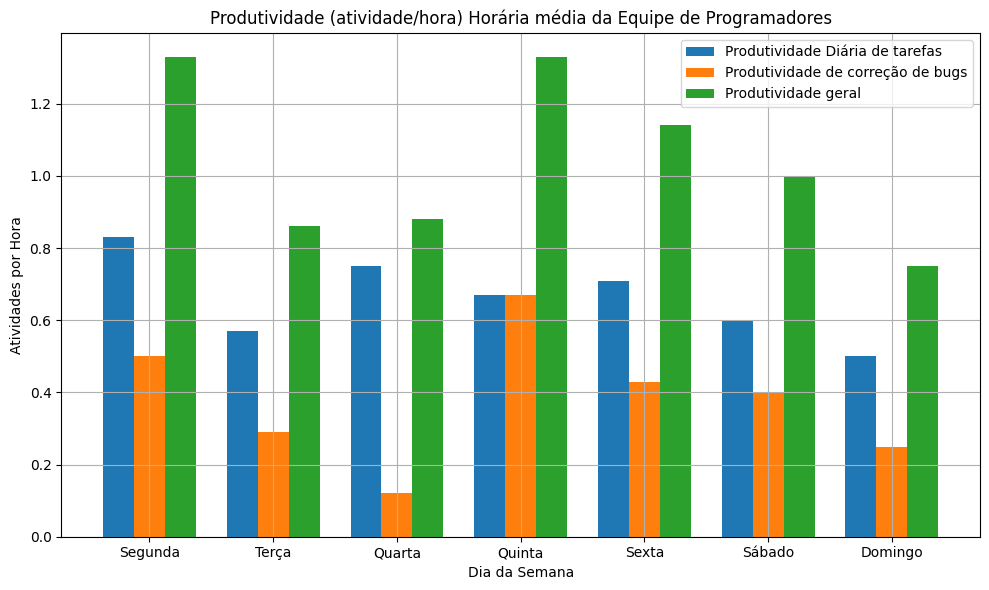

In [56]:
# Plotar gráfico de barras agrupadas
plt.figure(figsize=(10, 6))

width = 0.25
x = np.arange(len(df["Dias"]))

plt.bar(x - width, df["Produtividade Diária de tarefas"], width, label='Produtividade Diária de tarefas')
plt.bar(x, df["Produtividade de correção de bugs"], width, label='Produtividade de correção de bugs')
plt.bar(x + width, df["Produtividade geral"], width, label='Produtividade geral')

plt.xlabel("Dia da Semana")
plt.ylabel("Atividades por Hora")
plt.title("Produtividade (atividade/hora) Horária média da Equipe de Programadores")
plt.xticks(x, df["Dias"])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

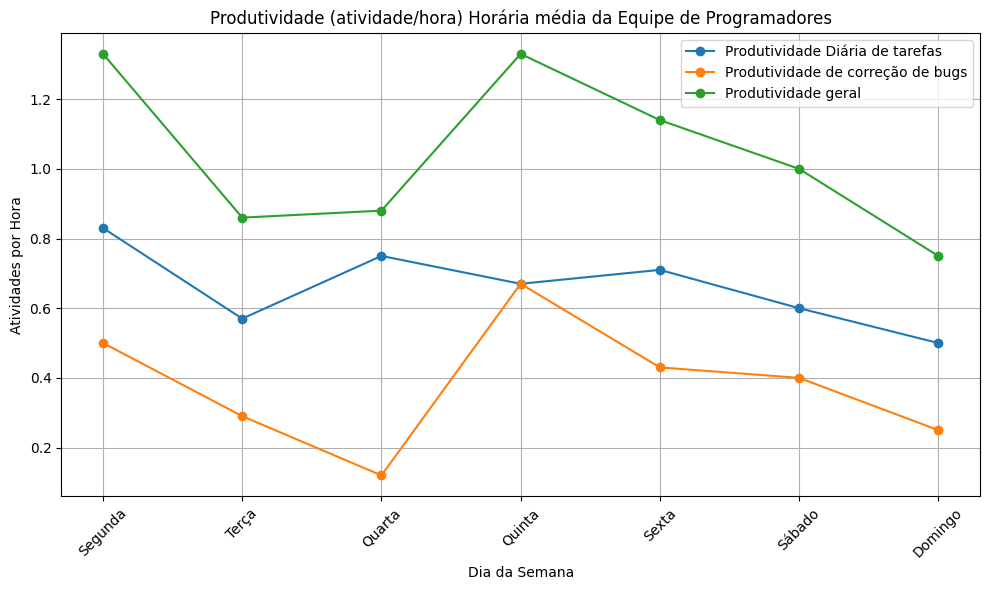

In [57]:
# Plotar gráfico de linhas
plt.figure(figsize=(10, 6))

plt.plot(df["Dias"], df["Produtividade Diária de tarefas"], marker='o', label="Produtividade Diária de tarefas")
plt.plot(df["Dias"], df["Produtividade de correção de bugs"], marker='o', label="Produtividade de correção de bugs")
plt.plot(df["Dias"], df["Produtividade geral"], marker='o', label="Produtividade geral")

plt.xlabel("Dia da Semana")
plt.ylabel("Atividades por Hora")
plt.title("Produtividade (atividade/hora) Horária média da Equipe de Programadores")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()